<a href="https://colab.research.google.com/github/ScipioAfricanus76/Bughouse-Openings/blob/main/Bughouse_Openings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
from google.colab import files

def extract_moves(game):
    moves = re.findall(r'(\d+[A-Za-z]\..*?)(?=\d+[A-Za-z]\.|$)', game, re.DOTALL)
    return [[move.strip() for move in move_set.split("\n") if move.strip()] for move_set in moves]

uploaded = files.upload()
file_name = next(iter(uploaded))

with open(file_name, 'r') as file:
    data = file.read()

games = data.split('\n\n')

first_5_moves = []
for game in games:
    moves = extract_moves(game)
    first_5_moves.append(moves)

better_moves = [game for game in first_5_moves if game != []]

Saving export2017 - Copy.bpgn to export2017 - Copy.bpgn


In [ ]:
import pandas as pd
# Function to extract moves from a game
def extract_moves(game):
    extracted_moves = []
    white_moves = []
    black_moves = []
    for i in range(len(game)):
      if len(game) >= 1:
        player_moves = {'A' : [], 'B' : [], 'a' : [], 'b' : []}

        count = 0
        for moves in game[i]:
          move_string = game[i][count][0].split('{')[0]


          count += 1
          if move_string.split('.')[0][-1] in player_moves:
            player_moves[move_string.split('.')[0][-1]].append(move_string)

        for player in range(4):
          #Finds checkmate for win vs loss
          if list(player_moves.items())[player][1] != []:
            if "#" in (list(player_moves.items())[player][1][-1]):
              if player == 0 or 2:
                player_moves["A"].append("1")
                player_moves["B"].append("0")
                player_moves["a"].append("1")
                player_moves["b"].append("0")
              else:
                player_moves["A"].append("0")
                player_moves["B"].append("1")
                player_moves["a"].append("0")
                player_moves["b"].append("1")


        for player in range(4):
          temp_list = []
          if len(list(player_moves.items())[player][1]) > 5:

            temp_list.append(list(player_moves.items())[player][1][0:5])

            temp_list[0].append(list(player_moves.items())[player][1][-1])
            #Separates white and black openings
            if(temp_list[0][0][0:2] == "1A" or temp_list[0][0][0:2] == "1B"):
              white_moves.append(temp_list[0])
            else:
              black_moves.append(temp_list[0])
            extracted_moves.append(temp_list[0])

    return pd.DataFrame(extracted_moves), pd.DataFrame(white_moves), pd.DataFrame(black_moves)

game_moves_df,white_moves_df,black_moves_df = extract_moves(better_moves)

print(game_moves_df)
print(black_moves_df)
print(white_moves_df)

              0        1        2        3         4          5
0        1A. e4  2A. Nc3   3A. d3   4A. e5  5A. exf6          1
1        1B. e4  2B. Nc3  3B. Nf3  4B. Ng5    5B. e5          0
2        1a. e6  2a. Nc6  3a. Nf6   4a. d5  5a. gxf6          1
3        1b. d5   2b. e6  3b. Nf6  4b. Bb4  5b. Nfd7          0
4        1A. e4  2A. Nc3   3A. d4  4A. Nf3   5A. Bd3   31A. Ke1
...         ...      ...      ...      ...       ...        ...
374964   1b. e6  2b. Nc6  3b. Nf6   4b. d5    5b. h6  12b. Nxd5
374965   1A. d4  2A. Nf3  3A. Ne5  4A. Nc3    5A. e3          1
374966   1B. e4   2B. d4  3B. Nc3  4B. Nf3    5B. e5          0
374967  1a. Nf6   2a. d5  3a. Bf5   4a. e6   5a. Bb4          1
374968   1b. e6  2b. Nc6  3b. Nf6  4b. Be7   5b. Ng4          0

[374969 rows x 6 columns]
              0        1         2         3         4          5
0        1a. e6  2a. Nc6   3a. Nf6    4a. d5  5a. gxf6          1
1        1b. d5   2b. e6   3b. Nf6   4b. Bb4  5b. Nfd7          0
2      

In [ ]:
n_games = game_moves_df.shape[0]
w_games = white_moves_df.shape[0]
b_games = black_moves_df.shape[0]

#Let's remove those pesky  (1., 2., 3., ...)

games = [[] for x in range(n_games-1)]
white_games = [[] for x in range(w_games-1)]
black_games = [[] for x in range(b_games-1)]
for j in range(5):
  for i in range (n_games-1):
    move = game_moves_df[j][i].split(". ")[1]
    games[i].append(move)
    if j == 4:
      games[i].append(game_moves_df[j+1][i])
  #game.remove('1')
  for k in range(w_games-1):
    move = white_moves_df[j][k].split(". ")[1]
    white_games[k].append(move)
    if j == 4:
      white_games[k].append(white_moves_df[j+1][k])

  for l in range(b_games-1):
    move = black_moves_df[j][l].split(". ")[1]
    black_games[l].append(move)
    if j == 4:
      black_games[l].append(black_moves_df[j+1][l])
temp_list = games
games = pd.DataFrame(games)
white_games = pd.DataFrame(white_games)
black_games = pd.DataFrame(black_games)


In [ ]:
final = games.groupby([0,1,2,3,4],group_keys=True, sort = True).size().sort_values(ascending=False)
final = pd.DataFrame(final)
final.to_csv('temp_openings.csv')


w_final = white_games.groupby([0,1,2,3,4],group_keys=True, sort = True).size().sort_values(ascending=False)
w_final = pd.DataFrame(w_final)
w_final.to_csv('white_openings.csv')


b_final = black_games.groupby([0,1,2,3,4],group_keys=True, sort = True).size().sort_values(ascending=False)
b_final = pd.DataFrame(b_final)
b_final.to_csv('black_openings.csv')

new_final = pd.read_csv('/content/temp_openings.csv')
new_final.columns = ["Move 1", "Move 2", "Move 3", "Move 4", "Move 5", "Frequency"]
w_final = pd.read_csv('/content/white_openings.csv')
w_final.columns = ["Move 1", "Move 2", "Move 3", "Move 4", "Move 5", "Frequency"]
b_final = pd.read_csv('/content/black_openings.csv')
b_final.columns = ["Move 1", "Move 2", "Move 3", "Move 4", "Move 5", "Frequency"]




w_final = pd.DataFrame(w_final)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



def game_to_array(game, color="white"):
  board = np.zeros((8,8,6))
  pieces = ['P', 'N', 'B', 'R', 'Q', 'K']
  if color.lower() == "white":
    piece_val = 1
  else:
    piece_val = -1


  n_games = game.shape[0]
  games = []
  for i in range (n_games-1):
    for j in range(5):
      piece = game["Move " + str(j + 1)][i][0]
      if piece in pieces:
        piece = piece
      else:
        piece = 'P'
      piece_ind = pieces.index(piece)
      castle = False
      #Figuring out where the piece is

      if game["Move " + str(j + 1)][i][1] == "x" or game["Move " + str(j + 1)][i][1] == "@":
        row = ord(game["Move " + str(j + 1)][i][2]) - 97
        col = int(game["Move " + str(j + 1)][i][3]) - 1
      elif len(game["Move " + str(j + 1)][i])  == 2:
        row = ord(game["Move " + str(j + 1)][i][0]) - 97
        col = int(game["Move " + str(j + 1)][i][1]) - 1
      elif game["Move " + str(j + 1)][i][2] == "x":
        row = ord(game["Move " + str(j + 1)][i][3]) - 97
        col = int(game["Move " + str(j + 1)][i][4]) - 1
      elif game["Move " + str(j + 1)][i] == "O-O":
        castle = True
        piece_one = "K"
        piece_two = "R"
        p1_row, p2_row = 0, 0
        p1_col = 7
        p2_col = 6
      elif game["Move " + str(j + 1)][i] == "O-O-O":
        castle = True
        piece_one = "K"
        piece_two = "R"
        p1_row, p2_row = 0
        p1_col = 3
        p2_col = 4
      elif game["Move " + str(j + 1)][i][1].isnumeric() == False and game["Move " + str(j + 1)][i][2].isnumeric() == False:

        row = ord(game["Move " + str(j + 1)][i][2]) - 97
        col = int(game["Move " + str(j + 1)][i][3]) - 1
      elif game["Move " + str(j + 1)][i][-1] == '+' or game["Move " + str(j + 1)][i][-1] == '#':

        row = ord(game["Move " + str(j + 1)][i][-3]) - 97
        col = int(game["Move " + str(j + 1)][i][-2]) - 1
      else:

        row = ord(game["Move " + str(j + 1)][i][-2]) - 97 #was 1
        col = int(game["Move " + str(j + 1)][i][-1]) - 1 #was 2
      if castle == False:
        board[row,col,piece_ind] = piece_val
      else:
        p1_ind = pieces.index(piece_one)
        p2_ind = pieces.index(piece_two)

        board[p1_row,p1_col,p1_ind] = piece_val
        board[p2_row,p2_col,p2_ind] = piece_val

    #print(i)
    games.append(board.copy())

  return games

In [ ]:
#Encoding time!
#Starting with the white pieces
#PCA

encoded_arrays = []

encoded_arrays = game_to_array(w_final[:][0:-2])
w_encoded_array = np.array(encoded_arrays)

pca = PCA(n_components = 3) # Representing in 3-d to start
w_encoded_pca = pca.fit_transform(w_encoded_array.reshape(-1,384))#8x8x6
max_clusters = 30
scores = []

for n_clusters in range(2, max_clusters + 1):
  kmeans = KMeans(n_clusters, random_state = 0) # selected random_state for consistent testing
  cluster_labels = kmeans.fit_predict(w_encoded_pca)
  silhouette_avg = silhouette_score(w_encoded_pca, cluster_labels)
  scores.append(silhouette_avg)

best_n_clusters = np.argmax(scores) + 2
print(best_n_clusters)

kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(w_encoded_pca)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[20.1058539   4.90229742  2.37105042]


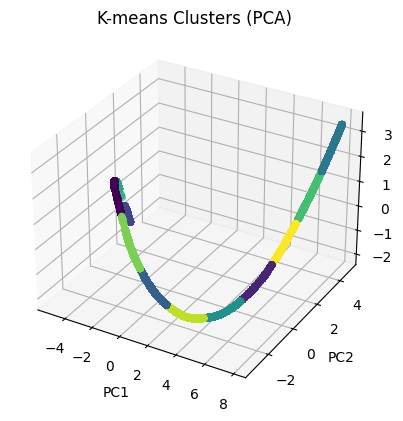

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plots
print(pca.explained_variance_)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(w_encoded_pca[:, 0], w_encoded_pca[:, 1], w_encoded_pca[:, 2], c=cluster_labels, cmap='viridis')
ax.set_title('K-means Clusters (PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
clusters = pca.inverse_transform(kmeans.cluster_centers_)

clusters_reshape = clusters.reshape(-1, 8, 8, 6)

#Gets representative moves from centroid
def array_to_moves(array):
  pieces = ['P', 'N', 'B', 'R', 'Q', 'K']
  temp_moves = []
  values = []
  for row in range (8):
    for col in range (8):
      for piece_ind in range(len(pieces)):
        if array[row, col, piece_ind] >=1:
          if len(temp_moves) < 5:
            values.append(array[row, col, piece_ind])
            temp_moves.append(pieces[piece_ind] + chr(row+97) + str(col + 1))
          elif (min(values) < array[row, col, piece_ind]):
            ind = values.index(min(values))
            values[ind] = array[row, col, piece_ind]
            temp_moves[ind] = pieces[piece_ind] + chr(row+97) + str(col + 1)

  return temp_moves

def find_all_openings(centroids):
  rep_openings = {}

  for cluster_ind, centroid in enumerate(centroids):
    moves = array_to_moves(centroid)
    rep_openings[cluster_ind] = moves
  return rep_openings

rep_openings = find_all_openings(clusters_reshape)

for cluster_ind, moves in rep_openings.items():
  print(f"Cluster {cluster_ind} Representative Opening: \n {moves} \n")

[[ 3.49917552e-16 -6.34953112e-17  2.60307197e-01 ...  6.69536331e-01
   0.00000000e+00 -3.58213737e-02]
 [-2.10279123e-16  3.95446261e-17  2.10016721e-02 ... -1.01683791e-01
   0.00000000e+00  1.15127314e-01]
 [-2.03217582e-16  3.36103586e-17  1.05022247e+00 ...  1.04937743e+00
   0.00000000e+00  9.25277585e-01]
 ...
 [ 1.67626917e-16 -2.27757520e-17  2.90971604e-03 ...  2.86549189e-01
   0.00000000e+00 -1.61724317e-01]
 [-2.09030794e-16  4.94798946e-17 -3.90748663e-02 ... -6.24938144e-02
   0.00000000e+00  1.57219744e-02]
 [-7.82664830e-17  9.27525168e-18  2.15862550e-02 ... -4.81759525e-02
   0.00000000e+00  6.76336912e-02]]
Cluster 0 Representative Opening: 
 ['Qf5', 'Kh1', 'Bg7', 'Ne7', 'Nc1'] 

Cluster 1 Representative Opening: 
 ['Pd4', 'Be2', 'Pe3', 'Nf3', 'Bf4'] 

Cluster 2 Representative Opening: 
 ['Qc3', 'Rd5', 'Ne1', 'Qg2', 'Kf3'] 

Cluster 3 Representative Opening: 
 ['Nh4', 'Ne3', 'Nh8', 'Nc7', 'Nd1'] 

Cluster 4 Representative Opening: 
 ['Pd4', 'Be2', 'Pe3', 'Nf3', 'Bf

In [ ]:
#Encoding time!
#Black Pieces
#PCA

b_encoded_arrays = []

b_encoded_arrays = game_to_array(b_final[:][0:-2])
b_encoded_array = np.array(b_encoded_arrays)

pca = PCA(n_components = 3)

b_encoded_pca = pca.fit_transform(b_encoded_array.reshape(-1,384))#8x8x6
max_clusters = 30
scores = []

for n_clusters in range(2, max_clusters + 1):
  b_kmeans = KMeans(n_clusters, random_state = 0) # selected random_state for consistent testing
  cluster_labels = b_kmeans.fit_predict(b_encoded_pca)
  silhouette_avg = silhouette_score(b_encoded_pca, cluster_labels)
  scores.append(silhouette_avg)

b_best_n_clusters = np.argmax(scores) + 2
print(b_best_n_clusters)

kmeans = KMeans(n_clusters=b_best_n_clusters, random_state=0)
b_cluster_labels = kmeans.fit_predict(b_encoded_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

29


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[15.98157197  4.14033957  2.24778616]


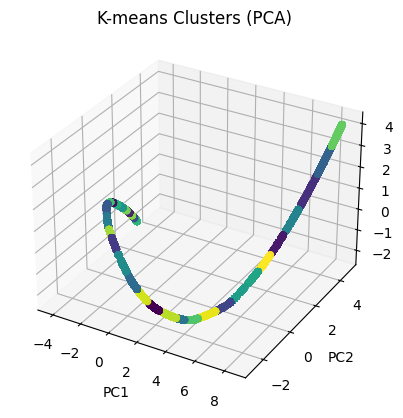

In [ ]:
#Was unsure of how best to represent data, got this from chatGPT as this was not crucial to the analysis
print(pca.explained_variance_)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(b_encoded_pca[:, 0], b_encoded_pca[:, 1], b_encoded_pca[:, 2], c=cluster_labels, cmap='viridis')
ax.set_title('K-means Clusters (PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
b_clusters = pca.inverse_transform(b_kmeans.cluster_centers_)
#print(clusters)
b_clusters_reshape = b_clusters.reshape(-1, 8, 8, 6)

#Gets representative moves from centroid
def array_to_moves(array):
  pieces = ['P', 'N', 'B', 'R', 'Q', 'K']
  temp_moves = []
  values = []
  for row in range (8):
    for col in range (8):
      for piece_ind in range(len(pieces)):
        if array[row, col, piece_ind] >=1:
          if len(temp_moves) < 5:
            values.append(array[row, col, piece_ind])
            temp_moves.append(pieces[piece_ind] + chr(row+97) + str(col + 1))
          elif (min(values) < array[row, col, piece_ind]):
            ind = values.index(min(values))
            values[ind] = array[row, col, piece_ind]
            temp_moves[ind] = pieces[piece_ind] + chr(row+97) + str(col + 1)

  return temp_moves

def find_all_openings(centroids):
  rep_openings = {}

  for cluster_ind, centroid in enumerate(centroids):
    moves = array_to_moves(centroid)
    rep_openings[cluster_ind] = moves
  return rep_openings

b_rep_openings = find_all_openings(b_clusters_reshape)

for cluster_ind, moves in b_rep_openings.items():
  print(f"Cluster {cluster_ind} Representative Opening: \n {moves} \n")

Cluster 0 Representative Opening: 
 ['Rf7', 'Nd2', 'Qc7', 'Bc2', 'Qh4'] 

Cluster 1 Representative Opening: 
 ['Bb2', 'Ra3', 'Pa4', 'Nb5', 'Re6'] 

Cluster 2 Representative Opening: 
 ['Nc6', 'Pd6', 'Pe6', 'Be7', 'Nf6'] 

Cluster 3 Representative Opening: 
 ['Kd6', 'Bh1', 'Be8', 'Na7', 'Qc3'] 

Cluster 4 Representative Opening: 
 ['Nc6', 'Pd6', 'Pe6', 'Be7', 'Nf6'] 

Cluster 5 Representative Opening: 
 ['Rb8', 'Kg6', 'Qg6', 'Qg2', 'Qf3'] 

Cluster 6 Representative Opening: 
 ['Rg8', 'Ba5', 'Qd7', 'Be4', 'Pc5'] 

Cluster 7 Representative Opening: 
 ['Bh7', 'Nh7', 'Rg6', 'Rf5', 'Qg7'] 

Cluster 8 Representative Opening: 
 ['Qf8', 'Ra3', 'Pa4', 'Kg7', 'Qc8'] 

Cluster 9 Representative Opening: 
 ['Nc6', 'Pd6', 'Pe6', 'Be7', 'Nf6'] 

Cluster 10 Representative Opening: 
 ['Qd6', 'Qb2', 'Bh6', 'Nb6', 'Qb4'] 

Cluster 11 Representative Opening: 
 ['Bb5', 'Bd8', 'Qe3', 'Qa6', 'Na5'] 

Cluster 12 Representative Opening: 
 ['Pg7', 'Pc7', 'Nc8', 'Rg7', 'Nb2'] 

Cluster 13 Representative Opening: 